# Performing a classical On/Off analysis

**In this tutorial you will learn to perform a classical On/Off analysis of the data.**

We start by importing the gammalib, ctools, and cscripts Python modules.

In [4]:
import gammalib
import ctools
import cscripts

We will also use matplotlib to display the results.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

And finally we add to our path the directory containing the example plotting scripts provided with the ctools installation.

In [6]:
import sys
import os
sys.path.append(os.environ['CTOOLS']+'/share/examples/python/')

## Preparing the binned observations

The first step for a classical analysis is to bin the events in bins of energy for an On (signal) region, and one or several Off (background regions).

We will use the event selection performed in the previous tutorial.

In [21]:
obsfile = "obs_crab_selected.xml"

phagen = cscripts.csphagen()
phagen['inobs'] = obsfile
phagen['inmodel'] = 'NONE' # assume that the source is pointlike
phagen['ebinalg'] = 'LOG'
phagen['emin'] = 0.66
phagen['emax'] = 30.
phagen['enumbins'] = 20
phagen['coordsys'] = 'CEL'
phagen['ra'] = 83.63
phagen['dec'] = 22.01
phagen['rad'] = 0.2
phagen['bkgmethod'] = 'REFLECTED'
phagen['use_model_bkg'] = False
phagen['maxoffset'] = 2.0
phagen['stack'] = True # treat observations separately in joint likelihood fit

phagen.run()

Note that we have used the hidden parameter *use_model_bkg* to specify that no background model should be used in the computation of the background normalisation factor, which is simply assumed to be the ratio of the solid angles of On/Off regions.

## Likelihood fit

The next step will be to fit a model for the source to the On data (along with a model for the background derived directly from the On/Off data). The model for the source is

In [22]:
srcmodel = os.environ['CTOOLS']+'/share/models/crab_nobkg.xml'

print(gammalib.GModels(srcmodel))

=== GModels ===
 Number of models ..........: 1
 Number of parameters ......: 6
=== GModelSky ===
 Name ......................: Crab
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6331 [-360,360] deg (fixed,scale=1)
  DEC ......................: 22.0145 [-90,90] deg (fixed,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 5.7e-17 +/- 0 [1e-24,1e-14] ph/cm2/s/MeV (free,scale=1e-17,gradient)
  Index ....................: -2.48 +/- 0 [-0,-5]  (free,scale=-1,gradient)
  PivotEnergy ..............: 1000000 [10000,1000000000] MeV (fixed,scale=1000000,gradient)
 Number of temporal par's ..: 1
  Normalization ............: 1 (relative value) (fixed,scale=1,gradient)


We can now fit this model to the data. Note that we have to specify WSTAT as statistic to derive the background model from the data without prior information.

In [23]:
like = ctools.ctlike(phagen.obs())

like['statistic'] = 'WSTAT'
like['inmodel'] = srcmodel

like.run()

We can now look at the results from the optimisation and the fitted model.

In [24]:
print(like.opt())
print(like.obs().models())

=== GOptimizerLM ===
 Optimized function value ..: 16.457
 Absolute precision ........: 0.005
 Acceptable value decrease .: 2
 Optimization status .......: converged
 Number of parameters ......: 6
 Number of free parameters .: 2
 Number of iterations ......: 4
 Lambda ....................: 1e-07
=== GModels ===
 Number of models ..........: 1
 Number of parameters ......: 6
=== GModelSky ===
 Name ......................: Crab
 Instruments ...............: all
 Instrument scale factors ..: unity
 Observation identifiers ...: all
 Model type ................: PointSource
 Model components ..........: "PointSource" * "PowerLaw" * "Constant"
 Number of parameters ......: 6
 Number of spatial par's ...: 2
  RA .......................: 83.6331 [-360,360] deg (fixed,scale=1)
  DEC ......................: 22.0145 [-90,90] deg (fixed,scale=1)
 Number of spectral par's ..: 3
  Prefactor ................: 4.58230817013557e-17 +/- 3.14037370499303e-18 [1e-24,1e-14] ph/cm2/s/MeV (free,scale=1e-17,

The fit has properly converged and the results are consistent with those obtained with the unbinned analysis.

We will also check the spectral residuals.

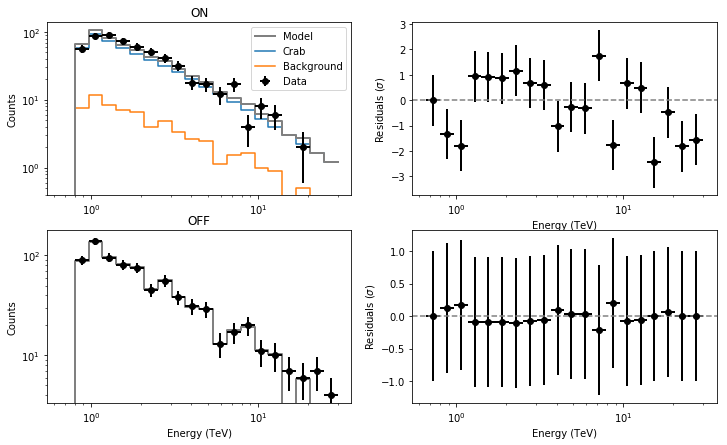

In [26]:
residuals = 'residuals_classical.fits'
res = cscripts.csresspec(like.obs())

res['statistic'] = 'WSTAT'
res['components'] = True
res['algorithm'] = 'SIGNIFICANCE'
res['outfile'] = residuals

res.execute()

from show_residuals import plot_residuals
plot_residuals(residuals,'',0)